# Create AI API client in python

In [2]:
root_path = "/Users/I559573/Documents/D2V2.0_PREP/btp-ai-core-bootcamp/src/ai-models/defect-detection"

In [1]:
from ai_api_client_sdk.ai_api_v2_client import AIAPIV2Client
import json

In [3]:
# Your service key JSON file relative to this notebook
aic_service_key_path = '/Users/I559573/AICore_Tutorial/files/aic_service_key.json'

# Loads the service key file
with open(aic_service_key_path) as ask:
    aic_service_key = json.load(ask)

# Creating an AI API client instance
ai_api_client = AIAPIV2Client(
    # The present AI API version is 2
    base_url = aic_service_key["serviceurls"]["AI_API_URL"] + "/v2", 
    auth_url=  aic_service_key["url"] + "/oauth/token",
    client_id = aic_service_key['clientid'],
    client_secret = aic_service_key['clientsecret']
)

# Connect GitHub and Docker to SAP AI Core

In [4]:
git_setup_file_path = root_path + "/files/git_setup.json"

In [56]:
# Loads your git_setup.json
with open(git_setup_file_path) as gs:
    setup_json = json.load(gs)

# Connects your repo
repo_json = setup_json["repo"]
response = ai_api_client.rest_client.post(
    path="/admin/repositories",
    body={
        "name": repo_json["name"],
        "url": repo_json["url"],
        "username": repo_json["username"],
        "password": repo_json["password"]
    }
)
print(response)

{'message': 'Repository has been on-boarded.'}


In [57]:
ai_api_client.rest_client.get(
    path="/admin/repositories"
)

{'count': 1,
 'resources': [{'name': 'aicore-test-calabria',
   'status': 'COMPLETED',
   'url': 'https://github.com/calabria/aicore-test'}]}

In [58]:
# Loads your git_setup.json
with open(git_setup_file_path) as gs:
    setup_json = json.load(gs)
    
# Registers the directory as app
app_json = setup_json["app_seg"]
response = ai_api_client.rest_client.post(
    path="/admin/applications",
    body={
        "applicationName": app_json["applicationName"],
        "repositoryUrl": app_json["repositoryUrl"],
        "revision": app_json["revision"],
        "path": app_json["path"]
    }
)

In [53]:
ai_api_client.rest_client.delete(
    path="/admin/repositories/aicore-test-calabria"
)

{'id': 'aicore-test-calabria',
 'message': 'Tenant has been removed from repository.'}

In [54]:
ai_api_client.rest_client.delete(
    path="/admin/applications/image-seg-app-calabria"
)

{'id': 'image-seg-app-calabria',
 'message': 'Application has been successfully deleted.'}

In [59]:
ai_api_client.rest_client.get(
    path="/admin/applications"
)

{'count': 3,
 'resources': [{'application_name': 'aicore-sound',
   'path': 'workflows_sound',
   'repository_url': 'https://github.com/calabria/aicore-test',
   'revision': 'HEAD'},
  {'application_name': 'defect-det-app-calabria',
   'path': 'workflows_image',
   'repository_url': 'https://github.com/calabria/aicore-test',
   'revision': 'HEAD'},
  {'application_name': 'image-seg-app-calabria',
   'path': 'workflows_seg',
   'repository_url': 'https://github.com/calabria/aicore-test',
   'revision': 'HEAD'}]}

In [118]:
#NB: Pay attentiont to the lenght of the workflow file names!!!
app_name = "image-seg-app-calabria"
#app_name = "aicore-sound"
#app_name = "defect-det-app-calabria"

ai_api_client.rest_client.get(
    path=f"/admin/applications/{app_name}/status"
)

{'health_status': 'Healthy',
 'message': 'successfully synced (all tasks run)',
 'reconciled_at': '2022-04-05T19:52:47Z',
 'source': {'path': 'workflows_seg',
  'repourl': 'https://github.com/calabria/aicore-test',
  'revision': 'b2a324f3733dad83736453da67d46eb6af990f13'},
 'sync_finished_at': '2022-04-05T16:34:54Z',
 'sync_ressources_status': [{'kind': 'ServingTemplate',
   'message': 'servingtemplate.ai.sap.com/image-seg-infer-tutorial unchanged',
   'name': 'image-seg-infer-tutorial',
   'status': 'Synced'},
  {'kind': 'WorkflowTemplate',
   'message': 'workflowtemplate.argoproj.io/image-seg-train-tutorial configured',
   'name': 'image-seg-train-tutorial',
   'status': 'Synced'}],
 'sync_started_at': '2022-04-05T16:34:48Z',
 'sync_status': 'Synced'}

# Connect Docker to SAP AI Core

In [ ]:
docker_secret_file_path = root_path + '/files/docker_secret.json'

# Loads the json file
with open(docker_secret_file_path) as dsf:
    docker_secret = json.load(dsf)

response = ai_api_client.rest_client.post(
    path="/admin/dockerRegistrySecrets",
    body={
        "name": docker_secret["name"],
        "data": docker_secret["data"]
    }
)
print(response)

In [9]:
ai_api_client.rest_client.get(
    path=f"/admin/dockerRegistrySecrets"
)

{'count': 1, 'resources': [{'name': 'docker-registry-secret'}]}

Create and upload the docker images for training:

- docker login docker.io -u yoshidj
- docker build -t yoshidj/image-seg-train:0.0.1 .
- docker push docker.io/yoshidj/image-seg-train:0.0.1

NB: In order to install sap-tracking-sdk, the VPN needs to be turned on

# Create Resource Group and Connect AWS S3 to SAP AI Core

In [ ]:
ai_api_client.rest_client.post(
    path="/admin/resourceGroups",
    body={
        "resourceGroupId": "defect-det" # Name of your resource group
    }
)

In [13]:
ai_api_client.rest_client.get(
    path=f"/admin/resourceGroups"
)

{'count': 4,
 'resources': [{'labels': [],
   'resource_group_id': 'calabria',
   'status': 'PROVISIONED',
   'status_message': 'All onboarding steps are completed.',
   'tenant_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810',
   'zone_id': ''},
  {'labels': [],
   'resource_group_id': 'defect-det',
   'status': 'PROVISIONED',
   'status_message': 'All onboarding steps are completed.',
   'tenant_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810',
   'zone_id': ''},
  {'labels': [],
   'resource_group_id': 'default',
   'status': 'PROVISIONED',
   'status_message': 'All onboarding steps are completed.',
   'tenant_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810',
   'zone_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810'},
  {'labels': [],
   'resource_group_id': 'sound',
   'status': 'PROVISIONED',
   'status_message': 'All onboarding steps are completed.',
   'tenant_id': 'df5fe658-4415-4a70-9aa9-6916c4c40810',
   'zone_id': ''}]}

In [ ]:
# Loads your service key
s3_service_key_path = root_path + "/files/s3_service_key.json"

# Loads the service key file
with open(s3_service_key_path) as s3sk:
    s3_service_key = json.load(s3sk)

default_secret = {
    "name": "default", # Name of the connection
    "type": "S3",
    "endpoint": s3_service_key["host"],
    "bucket": s3_service_key["bucket"],
    "pathPrefix": "ai_core_tutorial",
    "region": s3_service_key["region"],
    "data": {
        "AWS_ACCESS_KEY_ID": s3_service_key["access_key_id"],
        "AWS_SECRET_ACCESS_KEY": s3_service_key["secret_access_key"]
    }
}

# Call the api
ai_api_client.rest_client.post(
    path="/admin/objectStoreSecrets",
    body = default_secret, # defined above
    resource_group = "defect-det"
)

In [15]:
ai_api_client.rest_client.get(
    path="/admin/objectStoreSecrets",
    resource_group = "defect-det"
)

{'count': 1,
 'resources': [{'metadata': {'serving.kubeflow.org/s3-endpoint': 's3.amazonaws.com',
    'serving.kubeflow.org/s3-region': 'eu-central-1',
    'serving.kubeflow.org/s3-usehttps': '',
    'serving.kubeflow.org/s3-verifyssl': '',
    'storage.ai.sap.com/bucket': 'books-dataset',
    'storage.ai.sap.com/endpoint': 's3.amazonaws.com',
    'storage.ai.sap.com/path_prefix': 'ai_core_tutorial',
    'storage.ai.sap.com/region': 'eu-central-1',
    'storage.ai.sap.com/type': 'S3'},
   'name': 'default'}]}

secret_name = "default"

ai_api_client.rest_client.delete(
    path=f"/admin/objectStoreSecrets/{secret_name}",
    resource_group = "calabria"
)

# Train Execution of ML Model

In [17]:
import sys, os
import json
import requests
import base64
import time
import yaml
from IPython.display import clear_output
from pprint import pprint
import ast
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import cv2

from ai_api_client_sdk.ai_api_v2_client import AIAPIV2Client
from ai_api_client_sdk.models.artifact import Artifact
from ai_api_client_sdk.models.status import Status
from ai_api_client_sdk.models.target_status import TargetStatus
from ai_api_client_sdk.models.parameter_binding import ParameterBinding
from ai_api_client_sdk.models.input_artifact_binding import InputArtifactBinding

In [18]:
resource_group = "defect-det"  # Must be created before

aic_service_key = root_path + "/files/aic_service_key.json" # ENSURE YOU HAVE THE FILE PLACED CORRECTLY
with open(aic_service_key) as ask:
    aic_s_k = json.load(ask)

# NO CHANGES REQUIRED BELOW
#
ai_api_v2_client = AIAPIV2Client(
    base_url=aic_s_k["serviceurls"]["AI_API_URL"] + "/v2/lm",
    auth_url=aic_s_k["url"] + "/oauth/token",
    client_id=aic_s_k['clientid'],
    client_secret=aic_s_k['clientsecret'],
    resource_group=resource_group)

Check the available scenarios

In [77]:
scenario_resp = ai_api_v2_client.scenario.query(resource_group)

print("Scenarios")
print("---" * 20)
for idx, scenario in enumerate(scenario_resp.resources):
    print(f"Scenario ID {idx + 1} -> [{scenario.id}]")

Scenarios
------------------------------------------------------------
Scenario ID 1 -> [text-clf-tutorial]
Scenario ID 2 -> [image-clf-tutorial]
Scenario ID 3 -> [sound-scenario]
Scenario ID 4 -> [image-seg-tutorial]


Register the training data as an artifact

In [87]:
# Load training_workflow.yaml
training_workflow_file = root_path + "/workflows/training_workflow_seg.yaml"
with open(training_workflow_file) as twf:
    training_workflow = yaml.safe_load(twf)
#
# Load scenario id from train_workflow.yaml
scenario_id = training_workflow['metadata']['labels']['scenarios.ai.sap.com/id']

#
# Set the artifact configuration
artifact = {
        "name": "segmentation-train-data", # Modifiable Name
        "kind": Artifact.Kind.DATASET,
        "url": "ai://default/data",
        "description": "Light guide plate dataset",
        "scenario_id": scenario_id
    }
# Store the artifact response to retrieve the id for the training configuration
artifact_resp = ai_api_v2_client.artifact.create(**artifact)
print(f"Artifacts registered for {scenario_id} scenario!")
print(vars(artifact_resp))
#
# Checks if the message contains expected string
assert artifact_resp.message == 'Artifact acknowledged'

Artifacts registered for image-seg-tutorial scenario!
{'id': '2a08c02b-ab14-4e87-adaf-2e9ad81c69af', 'message': 'Artifact acknowledged', 'url': 'ai://default/data'}


Create training configuration

In [122]:
input_artifact_name = training_workflow['spec']['templates'][0]['inputs']['artifacts'][0]['name']
executable_name = training_workflow['metadata']['name']

artifact_binding = {
    "key": input_artifact_name,
    "artifact_id": artifact_resp.id
}

train_configuration = {
    "name": "dev-tutorial-training-configuration",
    "scenario_id": scenario_id,
    "executable_id": executable_name,
    "parameter_bindings": [],
    "input_artifact_bindings": [ InputArtifactBinding(**artifact_binding) ]
}

# store the configuration response to access the id to create an execution
train_config_resp = ai_api_v2_client.configuration.create(**train_configuration)
pprint(vars(train_config_resp))

assert train_config_resp.message == 'Configuration created'

print("Configuration created for running the training")

{'id': '0ae2ecfe-269c-496b-bafb-f29c3c666971',
 'message': 'Configuration created'}
Configuration created for running the training


Create training execution

In [123]:
execution_resp = ai_api_v2_client.execution.create(train_config_resp.id)
pprint(vars(execution_resp))

{'id': 'e1b6894048802b55',
 'message': 'Execution scheduled',
 'status': <Status.UNKNOWN: 'UNKNOWN'>}


Observe training status

In [124]:
status = None
while status != Status.COMPLETED and status != Status.DEAD:
    # Sleep for 5 secs to avoid overwhelming the API with requests
    time.sleep(5)
    # Clear outputs to reduce clutter
    clear_output(wait=True)

    execution = ai_api_v2_client.execution.get(execution_resp.id)
    status = execution.status
    print('...... execution status ......', flush=True)
    print(f"Training status: {execution.status}")
    pprint(f"Training status details: {execution.status_details}")

if execution.status == Status.COMPLETED:
    print(f"Training complete for execution [{execution_resp.id}]!")
    output_artifact = execution.output_artifacts[0]
    output = {
        "id": output_artifact.id,
        "name": output_artifact.name,
        "url": output_artifact.url
    }
    with open('training_output.json', 'w') as fp: #Save the reference to the model stored in S3
        json.dump(output, fp)

...... execution status ......
Training status: Status.COMPLETED
("Training status details: {'details': [{'container_name': 'main', "
 "'exit_code': 0, 'last_log_messages': 'pr  5 20:42 variables***/assets:total "
 '0***/variables:total 21868-rw-r--r--. 1 nobody nogroup 22383166 Apr  5 20:42 '
 '***-rw-r--r--. 1 nobody nogroup     6226 Apr  5 20:42 ***---End '
 "Training---...', 'message': '', 'pod_name': 'e1b6894048802b55', 'ready': "
 "False}, {'container_name': 'wait', 'exit_code': '', 'last_log_messages': "
 "'a6dc52 fbfbf91403fb2163f641812b3f1001cde99ce7c90be27be38b30703b34e37fc9] "
 'killed successfully"time="2022-04-05T20:42:***" level=info msg="Alloc=6749 '
 'TotalAlloc=29142 Sys=74577 NumGC=14 Goroutines=10"...\', \'message\': \'\', '
 "'pod_name': 'e1b6894048802b55', 'ready': True}], 'workflow_info': "
 "[{'exit_code': '', 'id': 'e1b6894048802b55', 'message': '', 'name': "
 "'e1b6894048802b55', 'outputs': '', 'phase': 'Running', 'type': 'Pod'}]}")
Training complete for execut

# Metrics and performance

In [125]:
filter_string = "executionId eq '" + execution_resp.id + "'"
metric_resp = ai_api_v2_client.metrics.query(execution_ids=execution_resp.id)

for m in metric_resp.resources:
    for metric in m.metrics:
        print(metric.name)
        print(metric.value)

Model accuracy
0.42640236020088196


In [126]:
all_metrics = []
for m in metric_resp.resources:
    for custom_info in m.custom_info:
        #print(custom_info.name)
        #print(custom_info.value)
        all_metrics.append(custom_info.value)

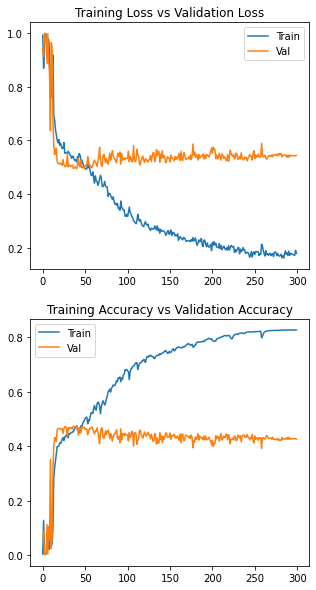

In [127]:
training_metrics = ast.literal_eval(all_metrics[0])
fig, axs = plt.subplots(2, 1, figsize=(5,10))

a = ast.literal_eval(training_metrics[0].get("loss"))
b = ast.literal_eval(training_metrics[1].get("val_loss"))
c = ast.literal_eval(training_metrics[2].get("iou"))
d = ast.literal_eval(training_metrics[3].get("val_iou"))

axs[0].plot(a)
axs[0].plot(b)
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(c)
axs[1].plot(d)
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

# Deploy ML Model

In [50]:
serving_workflow_file = root_path + "/workflows/serving_workflow_tutorial.yaml"
with open(serving_workflow_file) as swf:
    serving_workflow = yaml.safe_load(swf)

scenario_id = serving_workflow['metadata']['labels']['scenarios.ai.sap.com/id']
input_artifact_name = serving_workflow['spec']['inputs']['artifacts'][0]['name']
executable_name = serving_workflow['metadata']['name']

training_output = 'training_output.json'
with open(training_output) as to:
    serving_input = json.load(to)

In [51]:
artifact_binding = {
    "key": input_artifact_name,
    "artifact_id": serving_input["id"]
}

serve_configuration = {
    "name": "dev-tutorial-serving-configuration",
    "scenario_id": scenario_id,
    "executable_id": executable_name,
    "parameter_bindings": [],
    "input_artifact_bindings": [ InputArtifactBinding(**artifact_binding) ]
}

serve_config_resp = ai_api_v2_client.configuration.create(**serve_configuration)

assert serve_config_resp.message == 'Configuration created'

pprint(vars(serve_config_resp))
print("configuration for serving the model created")

{'id': '89d24758-01d2-4a15-81e5-76cab76f3329',
 'message': 'Configuration created'}
configuration for serving the model created


In [52]:
deployment_resp = ai_api_v2_client.deployment.create(serve_config_resp.id)
pprint(vars(deployment_resp))

{'deployment_url': '',
 'id': 'dfccff3697592a4a',
 'message': 'Deployment scheduled.',
 'status': <Status.UNKNOWN: 'UNKNOWN'>}


In [53]:
# Poll deployment status
status = None
while status != Status.RUNNING and status != Status.DEAD:
    time.sleep(5)
    clear_output(wait=True)
    #deployment_resp_id = "d82a366155be8696"
    deployment = ai_api_v2_client.deployment.get(deployment_resp.id)
    #deployment = ai_api_v2_client.deployment.get(deployment_resp_id)
    status = deployment.status
    print('...... deployment status ......', flush=True)
    print(deployment.status)
    pprint(deployment.status_details)

    if deployment.status == Status.RUNNING:
        print(f"Deployment with {deployment_resp.id} complete!")
        #print(f"Deployment with {deployment_resp_id} complete!")

# Allow some time for deployment URL to get ready
time.sleep(10)

...... deployment status ......
Status.RUNNING
{'deployment_info': [{'last_transition_time': '2022-03-23T15:51:49Z',
                      'message': None,
                      'status': 'True',
                      'type': 'IngressReady'},
                     {'last_transition_time': '2022-03-23T15:51:49Z',
                      'message': None,
                      'severity': 'Info',
                      'status': 'True',
                      'type': 'PredictorConfigurationReady'},
                     {'last_transition_time': '2022-03-23T15:51:49Z',
                      'message': None,
                      'status': 'True',
                      'type': 'PredictorReady'},
                     {'last_transition_time': '2022-03-23T15:51:42Z',
                      'message': None,
                      'severity': 'Info',
                      'status': 'True',
                      'type': 'PredictorRouteReady'},
                     {'last_transition_time': '2022-03-23T15:

# Using deployed ML model

- docker build -t YOUR_DOCKER_REPO/image-clf-serve:0.0.1 .
- docker push docker.io/YOUR_DOCKER_REPO/image-clf-serve:0.0.1

Let's define the local path to the dataset:

In [35]:
import glob

path_normal_images = glob.glob("../data/Images/OK/*")
path_abnormal_images = glob.glob("../data/Images/NG/*")
#print(path_normal_images)
#print(path_abnormal_images)

path_img_ok = root_path + "/data/Images/OK/"
path_img_ko = root_path + "/data/Images/NG/"
print(path_img_ok)
print(path_img_ko)

In [24]:
IMG_WIDTH=224
IMG_HEIGHT=224

def create_dataset(img_folder):
    img_data_array = []
    for file in os.listdir(img_folder):
            image_path = os.path.join(img_folder, file)
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image = np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
    return img_data_array

In [36]:
img_dataset_ok = create_dataset(path_img_ok)
img_dataset_ko = create_dataset(path_img_ko)
print(len(img_dataset_ok))
print(len(img_dataset_ko))

400
422


First let's visualize an example:

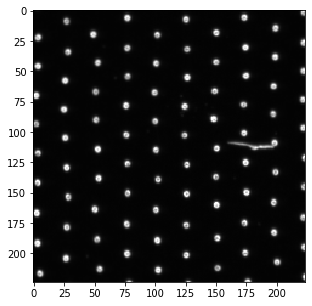

In [37]:
plt.figure(figsize = (5, 5))
plt.imshow(img_dataset_ko[0], interpolation='nearest')

In order to perform the inference step, let's transform one of the images into a string (this will constitute the body of the API call):

In [39]:
from base64 import b64encode
import base64
import io
from json import dumps

ENCODING = 'utf-8'

# first: reading the binary stuff
# note the 'rb' flag
# result: bytes
with open(path_normal_images[0], 'rb') as open_file:
    byte_content = open_file.read()

# second: base64 encode read data
# result: bytes (again)
base64_bytes = b64encode(byte_content)

# third: decode these bytes to text
# result: string (in utf-8)
base64_string = base64_bytes.decode(ENCODING)

# optional: doing stuff with the data
# result here: some dict
raw_data = {"image": base64_string}

In [38]:
f = open("image.txt", "w")
f.write(base64_string)
f.close()

In [54]:
# Preparing the input for inference
# prediciton: normal product

endpoint = f"{deployment.deployment_url}/v1/models/imagemodel:predict"
print(endpoint)

headers = {"Authorization": ai_api_v2_client.rest_client.get_token(),
           'ai-resource-group': resource_group,
           "Content-Type": "application/json"}
response = requests.post(endpoint, headers=headers, json=raw_data)

print('Inference result:', response.json())
#pprint(vars(response))

https://api.ai.prod.eu-central-1.aws.ml.hana.ondemand.com/v2/inference/deployments/dfccff3697592a4a/v1/models/imagemodel:predict
Inference result: {'Normal': '0.9998896477045491'}


# Stop deployed model

In [19]:
delete_resp = ai_api_v2_client.deployment.modify(deployment_resp.id,
                                                 target_status=TargetStatus.STOPPED)

#deployment_resp_id = "d835352306a37be6"
#delete_resp = ai_api_v2_client.deployment.modify(deployment_resp_id,
#                                                 target_status=TargetStatus.STOPPED)

status = None
while status != Status.STOPPED:
    time.sleep(5)
    clear_output(wait=True)
    deployment = ai_api_v2_client.deployment.get(deployment_resp.id)
    #deployment = ai_api_v2_client.deployment.get(deployment_resp_id)
    status = deployment.status
    print('...... killing deployment ......', flush=True)
    print(f"Deployment status: {deployment.status}")

...... killing deployment ......
Deployment status: Status.STOPPED
